### Introduction

Netflix, a pioneer in streaming media and entertainment services, has fundamentally transformed the way people consume content worldwide. Founded in 1997 as a DVD rental company, it transitioned to streaming in 2007 and rapidly grew to become a global leader, boasting a vast library of movies, TV shows, and documentaries. With millions of subscribers across more than 190 countries, Netflix offers content in multiple languages and caters to diverse cultural and demographic preferences. This growth reflects the industry-wide shift from traditional television to on-demand streaming services, driven by an increasing reliance on digital media.

### Industry Scope

The streaming industry has witnessed exponential growth over the last decade, disrupting the traditional media landscape. This shift has empowered viewers with greater flexibility and choice, and has encouraged other entertainment companies to enter the streaming market. As a result, platforms like Hulu, Amazon Prime Video, and Disney+ are constantly competing for viewer attention. Netflix’s unique advantage lies in its vast content catalog, which spans various genres, languages, and countries, and its investment in original productions, which have garnered critical acclaim and a loyal following.

### Purpose of the Analysis

This analysis aims to explore the content trends, regional preferences, and demographic targeting strategies of Netflix over the years. By examining content types, distribution across countries, genre popularity, release trends, and duration metrics, we can gain insights into how Netflix curates and expands its catalog to meet evolving viewer demands. The findings could provide valuable information for strategic decisions regarding content development, localization, and audience targeting.

### Dataset Overview

The dataset comprises 7,787 rows and 12 columns, each providing information about individual Netflix titles, such as their category, country of origin, and year of release. Below is an overview of the columns in the dataset:

| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `show_id`   | Unique identifier for each title.                                           |
| `type`      | Specifies whether the title is a "Movie" or "TV Show".                      |
| `title`     | Name of the title.                                                          |
| `director`  | Director of the title (if applicable).                                      |
| `cast`      | List of main cast members.                                                  |
| `country`   | Country where the content was produced.                                     |
| `date_added`| Date when the title was added to Netflix.                                   |
| `release_year` | Year the title was released.                                            |
| `rating`    | Content rating (e.g., TV-MA, PG-13).                                        |
| `duration`  | Duration of the title (minutes for Movies, seasons for TV Shows).           |
| `listed_in` | Genres associated with the title.                                           |
| `description` | Brief summary of the title.                                              |

This dataset allows us to analyze content distribution by country, trends over time, genre preferences, age demographics, and other key metrics. By examining these variables, we aim to uncover insights into Netflix’s content strategy and the broader streaming industry dynamics.

# 1. Imports and Setup

In [44]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # For visualizing missing data

# Set up visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Data Loading

In [45]:
# Load the Netflix dataset (replace 'netflix_data.csv' with your file path)
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Python Project/Netflix Data Analysis/netflix_dataset.csv')

# Display the first and last few rows to understand data structure
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [46]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",19-Oct-20,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,25-Sep-20,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,31-Oct-20,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States",1-Mar-20,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


# 3. Exploratory Data Analysis (EDA)

**3.1 Basic Dataset Information**

In [47]:
# Display the number of rows and columns
df.shape

(7787, 12)

In [48]:
# Check columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [49]:
# Display data types of each column
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


**3.2 Check for Missing Values**

<Axes: >

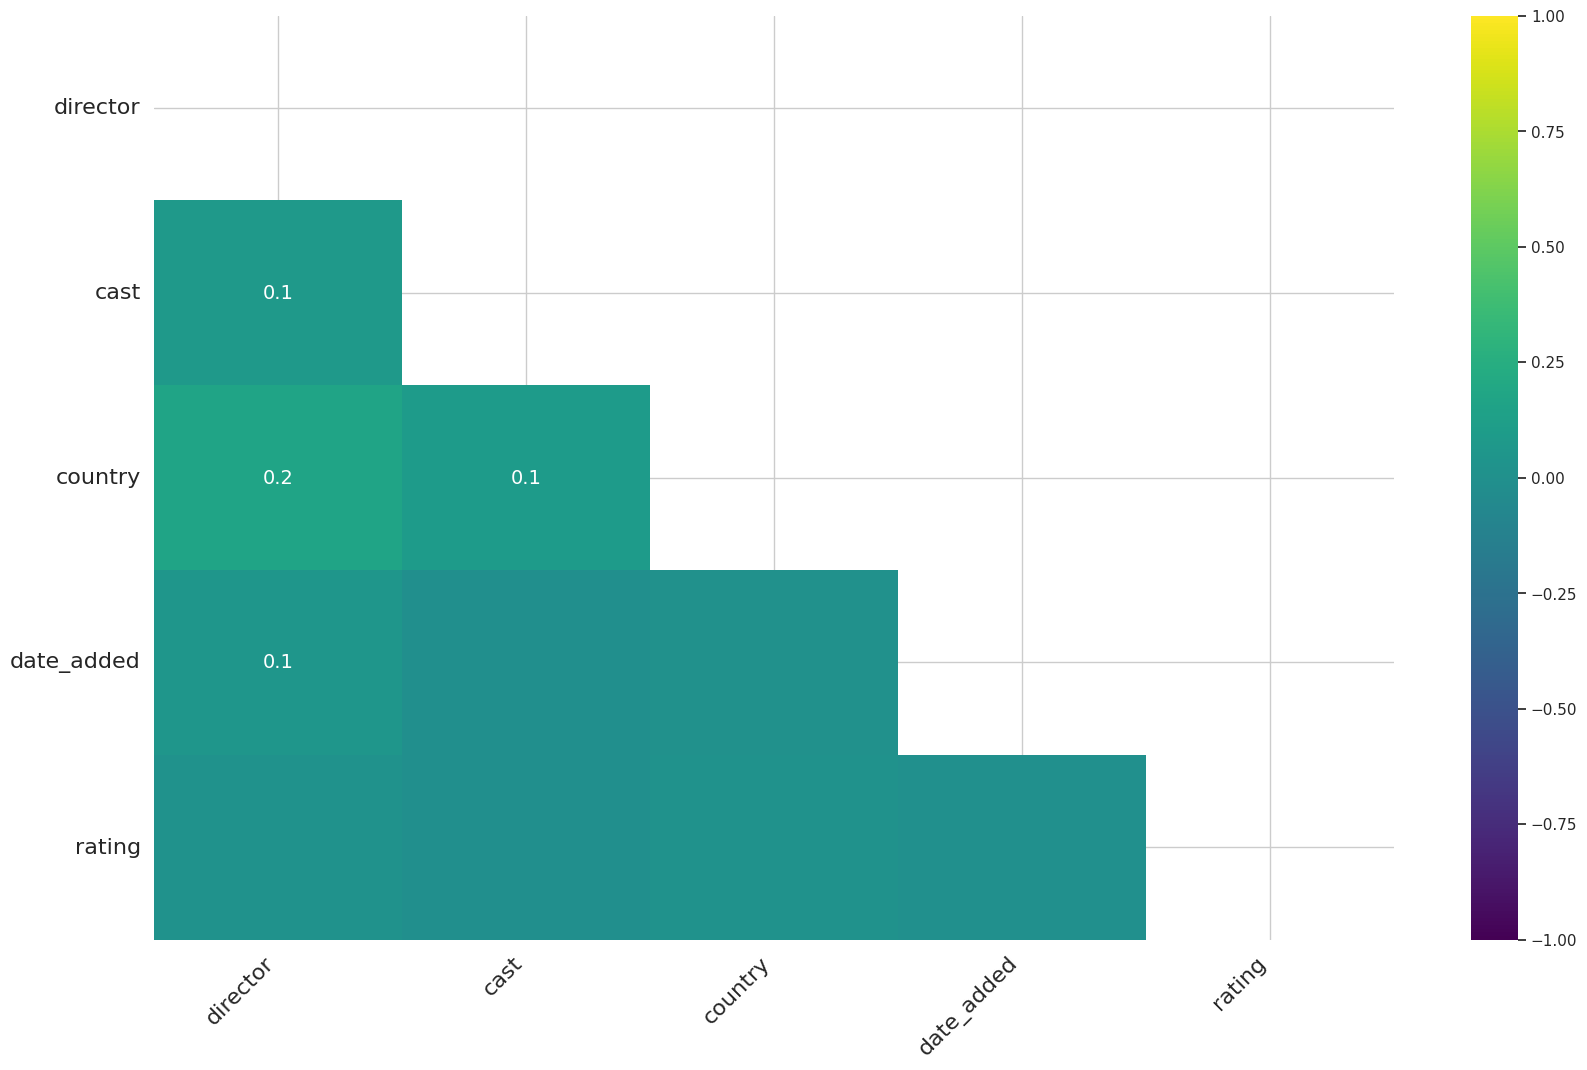

In [50]:
# Visualize missing data using a heatmap
msno.heatmap(df, cmap='viridis')

**3.3 Duplicate Rows**

In [51]:
# Count and remove duplicate rows
df.duplicated().sum()
df = df.drop_duplicates()

# 4. Insights and Queries

**4.1 Content Distribution (Movies vs. TV Shows)**

In [67]:
import pandas as pd

# Example DataFrame structure
data = {
    'type': ['Movie', 'TV Show'],
    'count': [150, 50]  # Example counts of Movies and TV Shows
}

df = pd.DataFrame(data)

# Calculate the ratio
df['percentage'] = df['count'] / df['count'].sum()
mf_ratio = df.set_index('type')


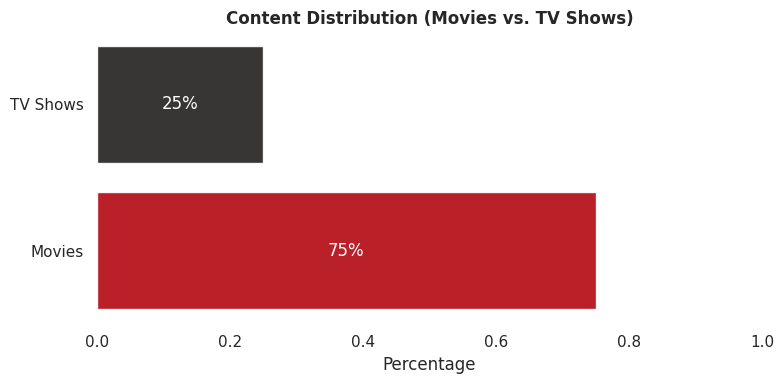

In [70]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Movies', 'TV Shows']  # Directly define labels for clarity
movies = mf_ratio.loc['Movie', 'percentage']
tv_shows = mf_ratio.loc['TV Show', 'percentage']

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Horizontal Bar Chart
ax.barh(labels, [movies, tv_shows], color=['#b20710', '#221f1f'], alpha=0.9)

# Set limits and labels
ax.set_xlim(0, 1)
ax.set_xlabel('Percentage')
ax.set_title('Content Distribution (Movies vs. TV Shows)', fontweight='bold')

# Adding percentage annotations
ax.annotate(f"{int(movies * 100)}%", xy=(movies / 2, 0), va='center', ha='center', fontsize=12, color='white')
ax.annotate(f"{int(tv_shows * 100)}%", xy=(tv_shows / 2, 1), va='center', ha='center', fontsize=12, color='white')

# Remove grid lines
ax.grid(False)

# Remove spines (optional for cleaner look)
for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

**4.2 Content by Country**

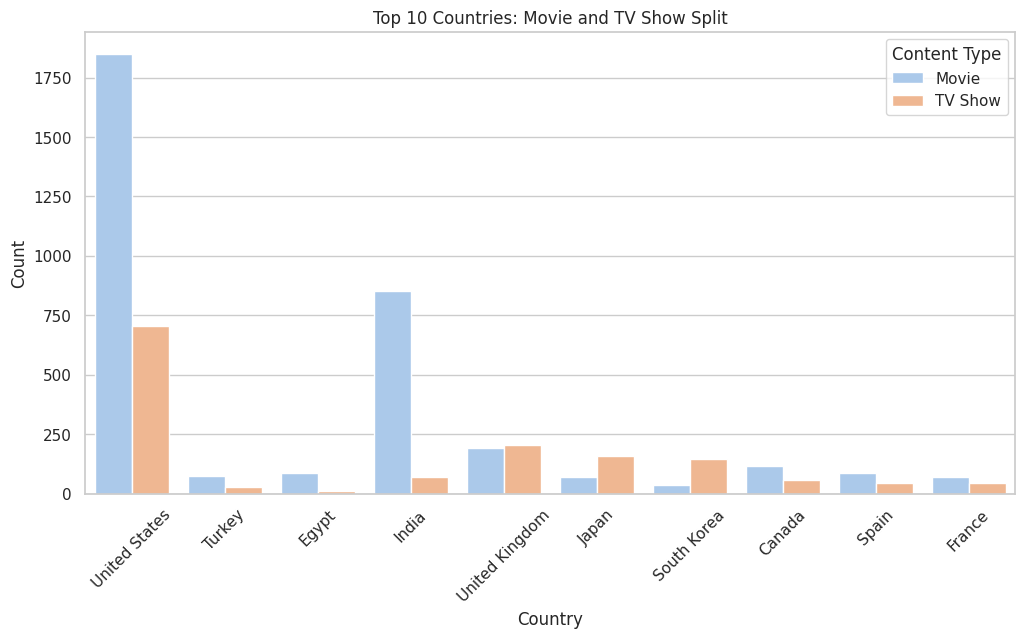

In [73]:
# Identify the top 10 countries with the most content on Netflix
top_countries = df['country'].value_counts().nlargest(10)
top_countries_df = df[df['country'].isin(top_countries.index)]

# Stacked Bar Chart for Top 10 Countries
plt.figure(figsize=(12, 6))
sns.countplot(data=top_countries_df, x='country', hue='type', palette='pastel')
plt.title("Top 10 Countries: Movie and TV Show Split")
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()

**Step 4.3: Content Added Over Time**

<ipython-input-74-dadcf18ad24f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year


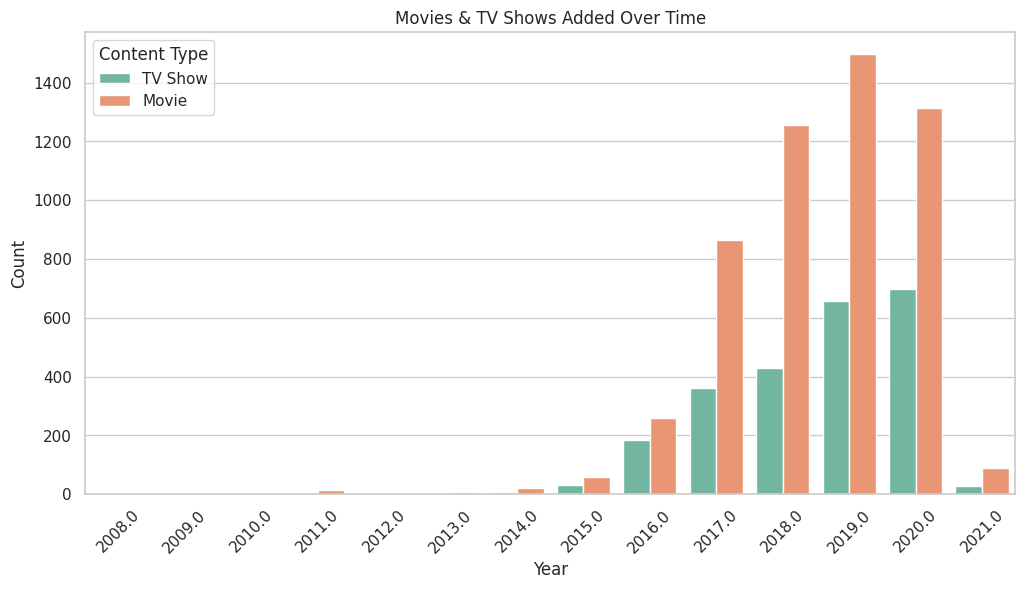

In [74]:
# Extract year from the date_added column
df['Year'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
yearly_content = df['Year'].value_counts().sort_index()

# Column Chart for Content Added Over Time
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', hue='type', palette='Set2')
plt.title("Movies & TV Shows Added Over Time")
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()

**Step 4.4: Target Age Demographics**

<ipython-input-75-9910a64bb36c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_ratings_dist.index, y=age_ratings_dist.values, palette='viridis')


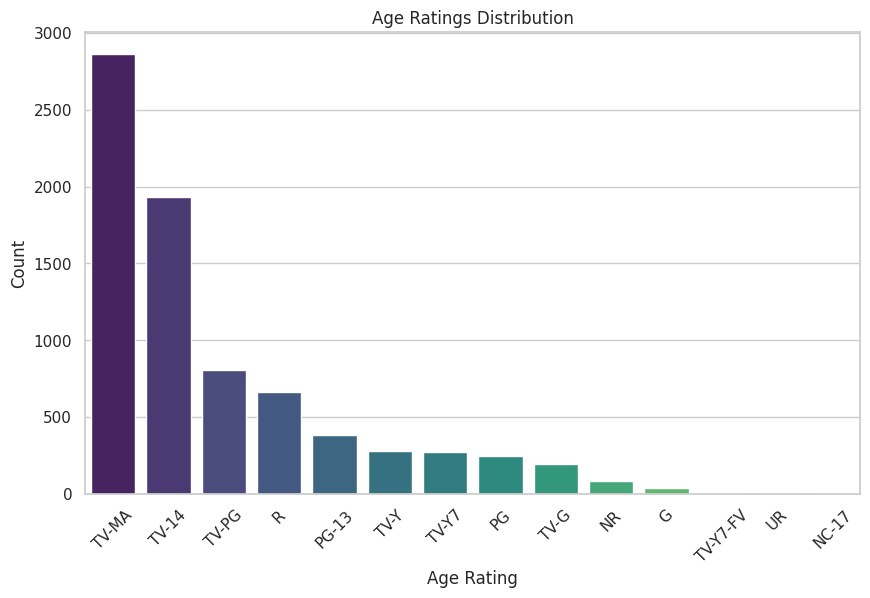

In [75]:
# Age rating distribution
age_ratings_dist = df['rating'].value_counts()

# Column Chart for Age Ratings Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_ratings_dist.index, y=age_ratings_dist.values, palette='viridis')
plt.title("Age Ratings Distribution")
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Visualizations

**5.1 Content Distribution by Category**

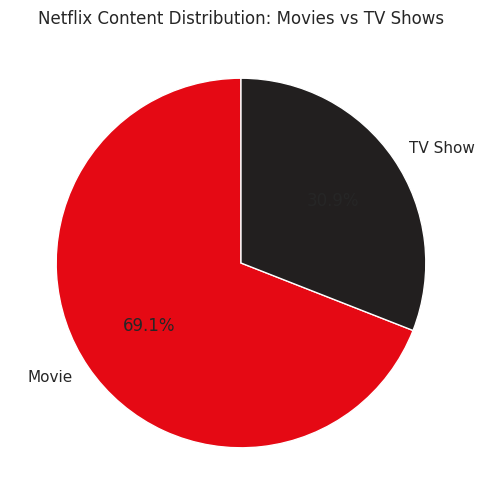

In [77]:
# Pie chart for Movie and TV Show distribution
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=[netflix_red, netflix_black])
plt.title("Netflix Content Distribution: Movies vs TV Shows")
plt.ylabel('')
plt.show()

**5.2 Content by Country (Top 10)**

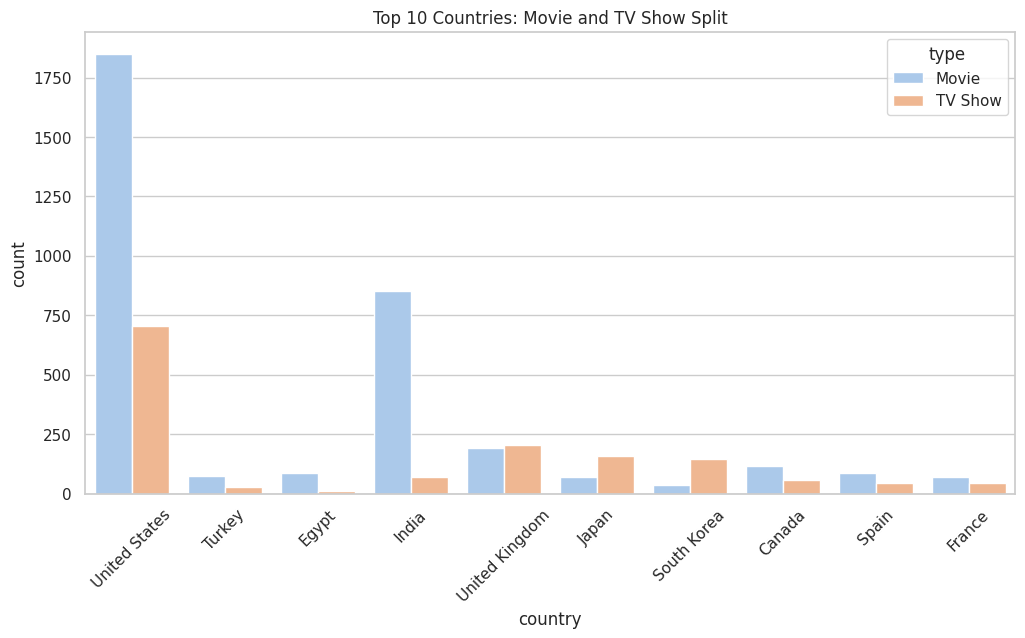

In [78]:
# Stacked bar chart for top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(data=top_countries_df, x='country', hue='type', palette='pastel')
plt.title("Top 10 Countries: Movie and TV Show Split")
plt.xticks(rotation=45)
plt.show()

**5.3 Content Added Over Time**

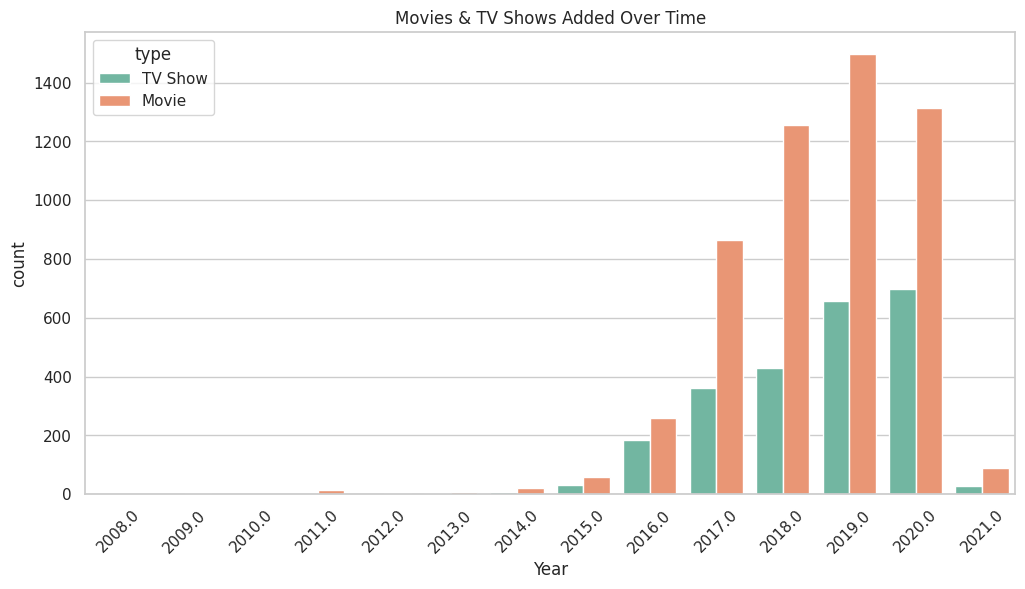

In [79]:
# Content additions over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', hue='type', palette='Set2')
plt.title("Movies & TV Shows Added Over Time")
plt.xticks(rotation=45)
plt.show()

**5.4 Monthly Content Additions**

<ipython-input-83-c099d03177b8>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month


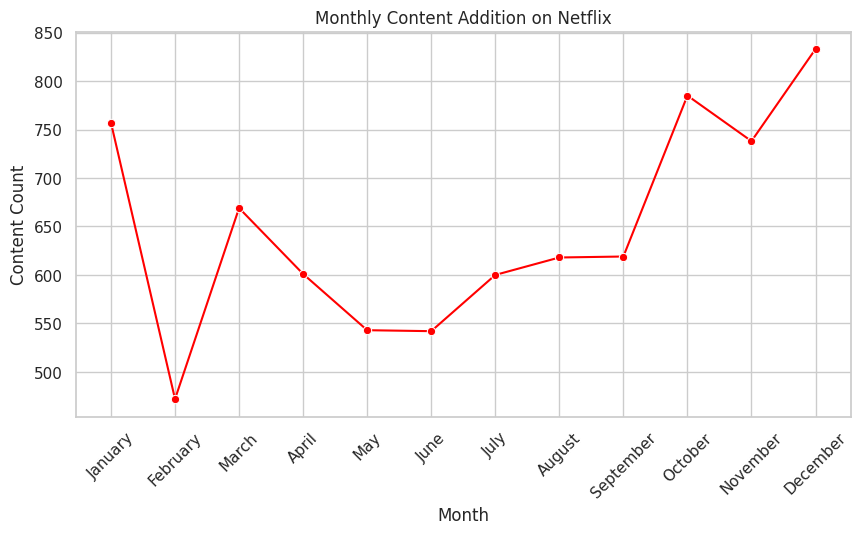

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming df is already defined and contains the 'date_added' column

# Extract month from release date for line chart
df['Month'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month
monthly_content = df.groupby('Month').size()

# Line chart for monthly content additions
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_content.index, y=monthly_content.values, marker="o", color='red')  # Replace 'netflix_red' with actual color if not defined
plt.title("Monthly Content Addition on Netflix")
plt.xlabel("Month")
plt.ylabel("Content Count")

# Set the x-ticks to be the month names instead of numbers
month_names = [calendar.month_name[i] for i in range(1, 13)]  # Generate month names
plt.xticks(monthly_content.index, month_names, rotation=45)  # Rotate for better visibility

plt.show()


**5.5 Age Ratings Distribution by Country**

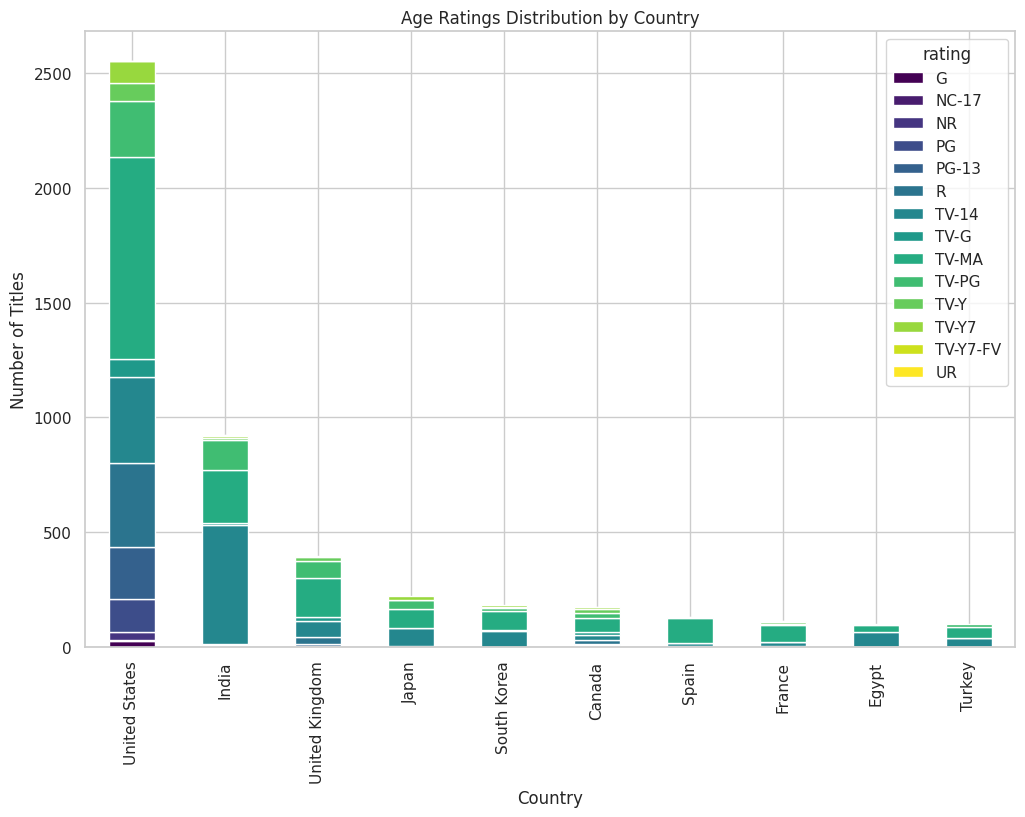

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains 'country' and 'rating' columns

# Age ratings distribution by country
age_ratings_by_country = df.groupby(['country', 'rating']).size().unstack().fillna(0)

# Check which top countries are in the age ratings data
valid_top_countries = top_countries.index[top_countries.index.isin(age_ratings_by_country.index)]

# Plot the data for valid top countries only
age_ratings_by_country.loc[valid_top_countries].plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(12, 8)
)
plt.title("Age Ratings Distribution by Country")
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.show()

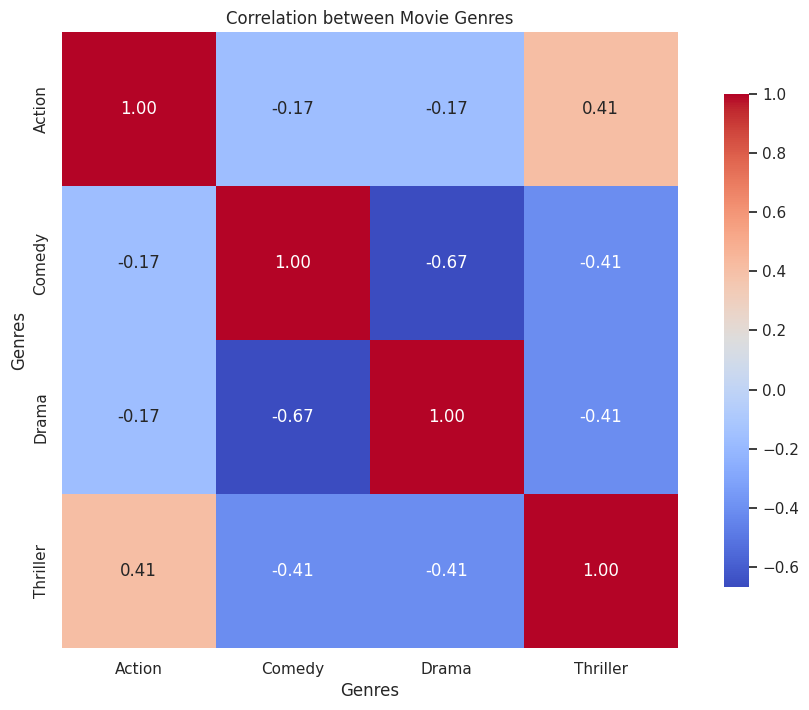

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset creation (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
data = {
    'title': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'],
    'genres': ['Action, Comedy', 'Comedy', 'Action, Drama', 'Drama', 'Action, Thriller']
}
df = pd.DataFrame(data)

# Create dummy variables for the genres
genre_dummies = df['genres'].str.get_dummies(sep=', ')

# Compute the correlation matrix
correlation_matrix = genre_dummies.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Titles and labels
plt.title('Correlation between Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Genres')
plt.show()


# 6. Advanced Insights and Analysis

**6.1 Maximum Content Duration**

In [96]:
# Find maximum duration
max_duration = df['duration'].max()
max_duration

'99 min'

**6.2 Content Rating Analysis**

In [97]:
# Count of movies in Canada with TV-14 rating
tv_14_canada = df[(df['rating'] == 'TV-14') & (df['country'] == 'Canada') & (df['type'] == 'Movie')]
len(tv_14_canada)

11

**6.3 Country with Most TV Shows**

In [98]:
# Country with the highest count of TV shows
country_tv_shows = df[df['type'] == 'TV Show']['country'].value_counts().idxmax()
country_tv_shows

'United States'

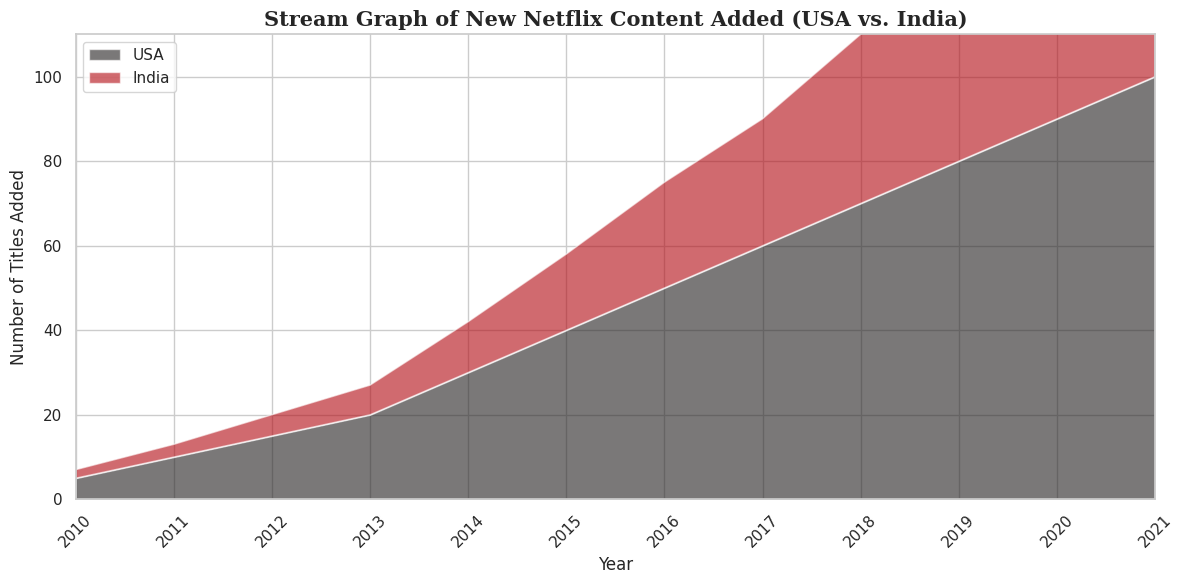

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulating a DataFrame with data from 2010 to 2021
years = list(range(2010, 2022))
usa_content = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Example data for USA
india_content = [2, 3, 5, 7, 12, 18, 25, 30, 40, 55, 70, 80]  # Example data for India

# Create a DataFrame
data = {
    'year_added': years,
    'USA': usa_content,
    'India': india_content
}

us_ind = pd.DataFrame(data)

# Prepare the data for the stream graph
us_ind.set_index('year_added', inplace=True)

# Create a stream graph
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for each country
colors = ['#221f1f', '#b20710']

# Plot each country’s content
ax.stackplot(us_ind.index, us_ind['USA'], us_ind['India'], labels=us_ind.columns, colors=colors, alpha=0.6)

# Customize the plot
ax.set_title('Stream Graph of New Netflix Content Added (USA vs. India)', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Titles Added', fontsize=12)
ax.legend(loc='upper left')
ax.set_xlim(us_ind.index.min(), us_ind.index.max())
ax.set_ylim(0, us_ind.values.max() + 10)

# Format the x-ticks
plt.xticks(us_ind.index, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


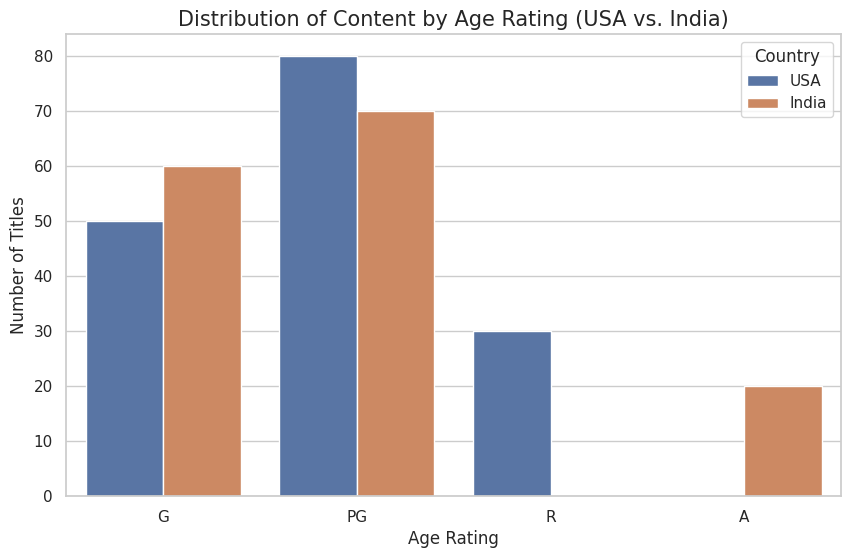

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data simulating age ratings for different countries
data = {
    'country': ['USA', 'USA', 'USA', 'India', 'India', 'India'],
    'age_rating': ['G', 'PG', 'R', 'G', 'PG', 'A'],
    'count': [50, 80, 30, 60, 70, 20]
}

df = pd.DataFrame(data)

# Create a bar plot to show the distribution of content by age rating
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age_rating', y='count', hue='country')
plt.title('Distribution of Content by Age Rating (USA vs. India)', fontsize=15)
plt.xlabel('Age Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Country')
plt.show()


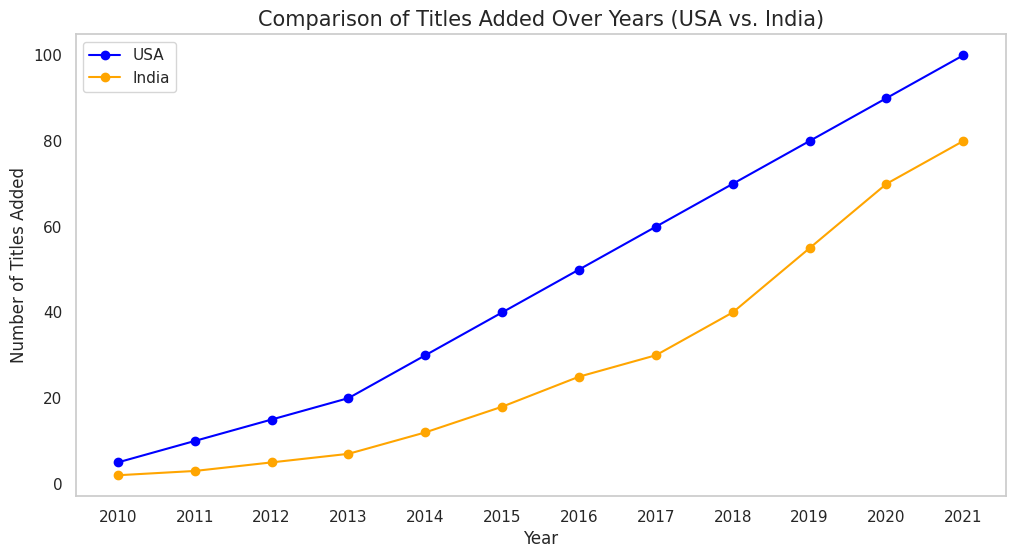

In [101]:
import numpy as np

# Simulated data for titles added per year from 2010 to 2021
years = list(range(2010, 2022))
usa_titles = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
india_titles = [2, 3, 5, 7, 12, 18, 25, 30, 40, 55, 70, 80]

# Create a DataFrame
comparison_data = pd.DataFrame({
    'year': years,
    'USA': usa_titles,
    'India': india_titles
})

# Create a line plot for USA and India
plt.figure(figsize=(12, 6))
plt.plot(comparison_data['year'], comparison_data['USA'], marker='o', label='USA', color='blue')
plt.plot(comparison_data['year'], comparison_data['India'], marker='o', label='India', color='orange')
plt.title('Comparison of Titles Added Over Years (USA vs. India)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(years)
plt.legend()
plt.grid()
plt.show()


## Conclusion

The **Netflix Content Analysis** project has revealed significant insights into the streaming platform's strategies for catering to diverse audiences. By comparing content trends between the USA and India, we observed distinct patterns in the growth of content addition, particularly after Netflix's entry into the Indian market in 2016.

Key findings include the identification of target age demographics, variations in ratings across regions, and the presence of notable actors, which highlight Netflix's tailored approach to meet viewer preferences. Overall, this analysis underscores the importance of understanding regional differences in content strategy, providing a foundation for future explorations into streaming trends.